# Lending Club Case Study

## Import all the relavant library


In [1278]:
#Import all the necessory Libraries

import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Read the Input CSV file

In [1189]:
loan = pd.read_csv("loan.csv",low_memory=False)
#print(loan.describe())

### Check the dataframe property

In [1190]:
# Check the Dataframe 
print(loan.info())

# Check how many col & rows are present in the Dataframe
print(loan.shape)

# Dumping initial set of Dataset rows to check the values
#print(loan.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
(39717, 111)


# Data Cleaning and Manipulation

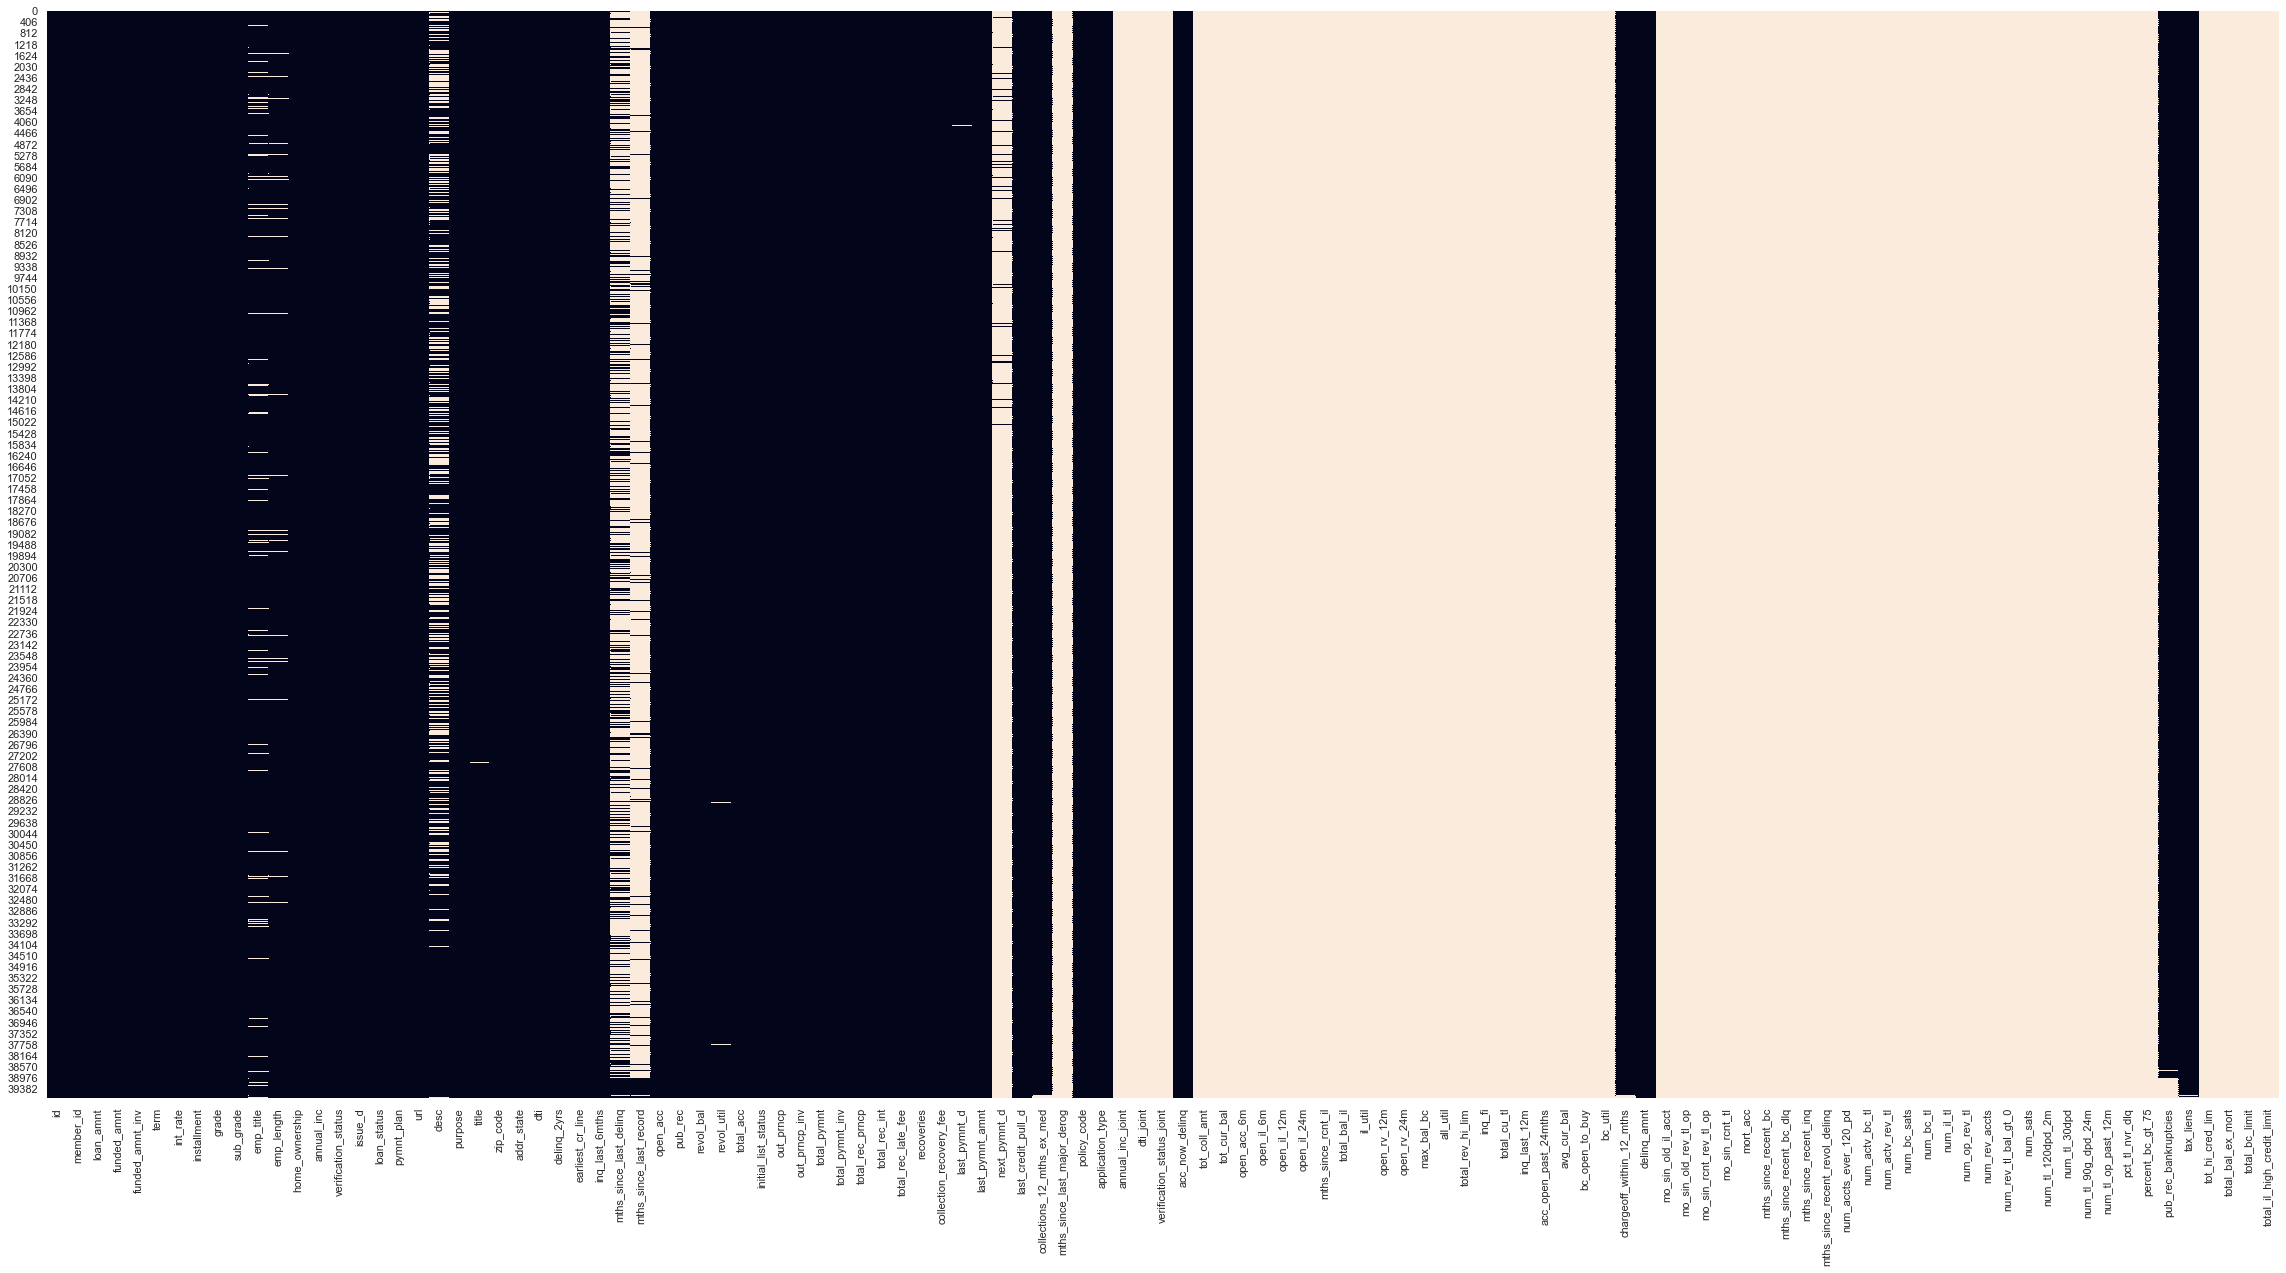

In [1191]:
# Dataset contains a lot of columns with only NA values.. 

#Ploting heatmap to check what are the colums and which has only NA 
plt.subplots(figsize=(40,20))
sns.heatmap(loan.isnull(), cbar=False)
plt.show()
# still there are few Columns which has majority of missing values

Totally, Dataset has  57 columns with more than 50% of missing values


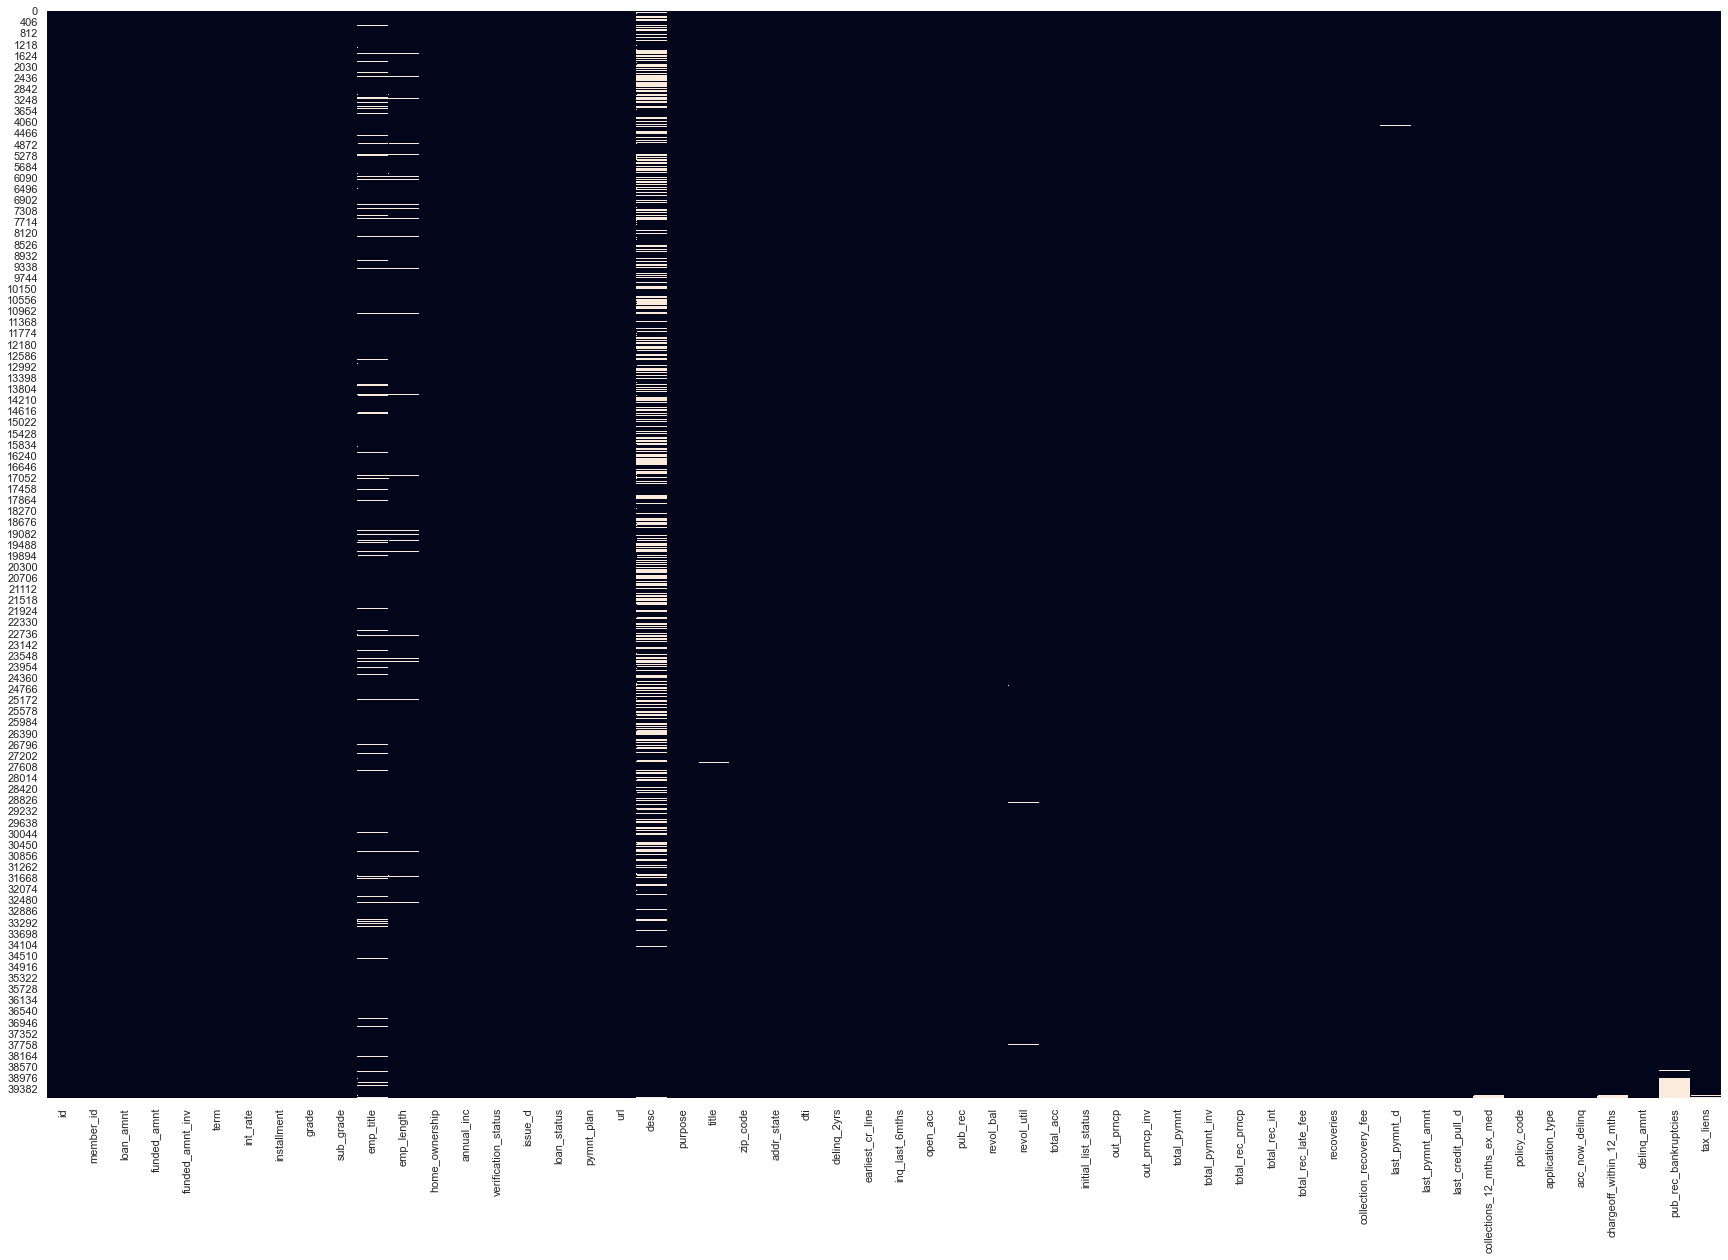

In [1192]:
# delete all the columns which has more than 50% of missing data

missing_data_limit = round((loan['id'].count() * 50) / 100)

col_tobe_del = loan.isnull().sum() > missing_data_limit
col_tobe_del = list(col_tobe_del[col_tobe_del == True].index)

print("Totally, Dataset has ", len(col_tobe_del) ,"columns with more than 50% of missing values")

loan = loan.drop(col_tobe_del, axis=1)

plt.subplots(figsize=(30,20))
sns.heatmap(loan.isnull(), cbar=False)
plt.show()      

In [1193]:
#check which columns has missing value and fill the missing value with proper value
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [1194]:
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna(0)

In [1195]:
#The following
del_list = ["url", "id", "member_id", "desc", "zip_code", "last_credit_pull_d", "emp_title", "out_prncp_inv", "title", "pymnt_plan"]
loan = loan.drop(del_list, axis=1)
del_list = ["earliest_cr_line","initial_list_status","out_prncp","collection_recovery_fee","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","tax_liens","last_pymnt_d","chargeoff_within_12_mths"]
loan = loan.drop(del_list, axis=1)
del_list = ["total_rec_int","total_rec_late_fee","recoveries","open_acc", "pub_rec","pub_rec_bankruptcies","total_acc","last_pymnt_amnt",'delinq_amnt']
loan = loan.drop(del_list, axis=1)



In [1196]:
print(loan.shape)
loan.isna().sum()

(39717, 24)


loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
revol_bal                 0
revol_util               50
total_pymnt               0
total_pymnt_inv           0
total_rec_prncp           0
dtype: int64

In [1197]:
print(loan.dtypes.value_counts())

object     12
float64     7
int64       5
dtype: int64


In [1287]:
loan.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
inq_last_6mths            int64
revol_bal                 int64
revol_util              float64
total_pymnt             float64
total_pymnt_inv         float64
total_rec_prncp         float64
issue_month              object
issue_year               object
annual_inc_bins        category
int_rate_bin           category
dti_rate_bin           category
revol_util_bin         category
revol_bal_bin          category
dtype: object

In [1199]:
#check the Object types and manipulate the values appropriately
print(loan.select_dtypes("object").head(5))

         term int_rate grade sub_grade emp_length home_ownership  \
0   36 months   10.65%     B        B2  10+ years           RENT   
1   60 months   15.27%     C        C4   < 1 year           RENT   
2   36 months   15.96%     C        C5  10+ years           RENT   
3   36 months   13.49%     C        C1  10+ years           RENT   
4   60 months   12.69%     B        B5     1 year           RENT   

  verification_status issue_d  loan_status         purpose addr_state  \
0            Verified  Dec-11   Fully Paid     credit_card         AZ   
1     Source Verified  Dec-11  Charged Off             car         GA   
2        Not Verified  Dec-11   Fully Paid  small_business         IL   
3     Source Verified  Dec-11   Fully Paid           other         CA   
4     Source Verified  Dec-11      Current           other         OR   

  revol_util  
0     83.70%  
1      9.40%  
2     98.50%  
3        21%  
4     53.90%  


# Data Cleaning and Manupulating
## Fix The colums data of term, int_rate, revol_util, emp_length

In [1200]:

#Removing postfixed 'years'.
loan['emp_length'] = loan['emp_length'].str[:-5]
#Replacing '10+' with 10.
loan['emp_length'] = loan['emp_length'].apply(lambda x: '10' if x == '10+ ' else x)
#Replacing '<1' with 1.
loan['emp_length'] = loan['emp_length'].astype(str).str.lstrip('<')
#Replacing missing values with median, which means emp_length is empty.
loan['emp_length'] = loan['emp_length'].fillna(loan['emp_length'].median())
#Replacing wrong values with 0, which means emp_length is empty.
loan['emp_length'] = loan['emp_length'].apply(lambda x: '0' if x == 'nan' else x)
loan['emp_length'] = loan['emp_length'].astype(str).str.strip('').astype('int')

#remove % symbol
loan["int_rate"] = loan["int_rate"].astype(str).str.rstrip('%').astype("float")
loan["revol_util"] = loan['revol_util'].astype(str).str.rstrip('%').astype("float")

#fill missing vlaues with median value for revol_util
median = loan["revol_util"].median()
loan['revol_util'] = loan['revol_util'].fillna(median)

# remove postfix from term
loan['term'] = loan['term'].astype(str).str.strip(' months').astype('int')

#Creating new column 'issue_month'
loan['issue_month'] = loan['issue_d'].apply(lambda x: x[:3])
#Creating new column 'issue_year'
loan['issue_year'] = loan['issue_d'].apply(lambda x: '20'+x[-2:])
loan = loan.drop('issue_d', axis=1)

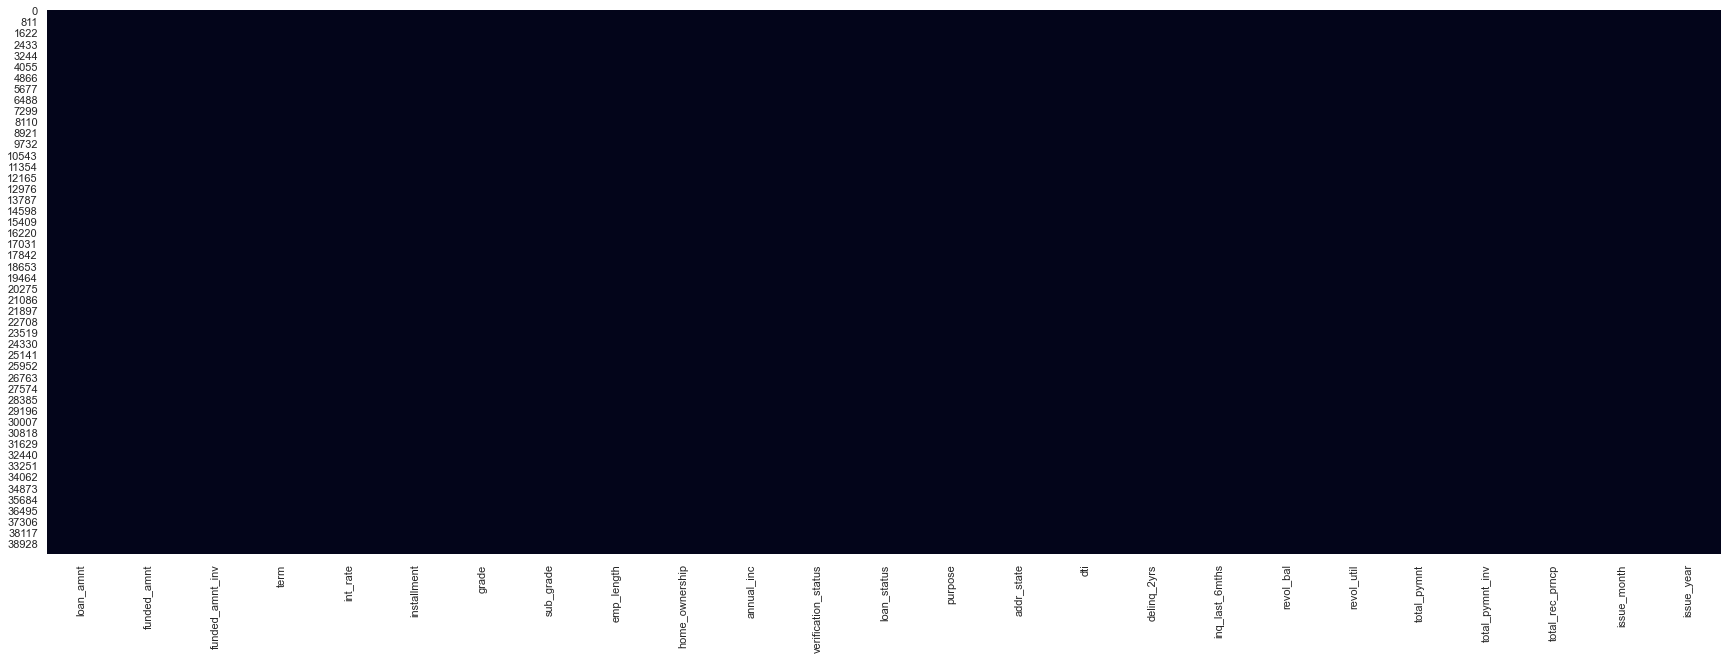

In [1201]:
# Check still anything is missing in the dataset
plt.subplots(figsize=(30,10))
sns.heatmap(loan.isnull(), cbar=False)
plt.show() 

# Data Analysis
## Perform Univariate, Bivariate and Multivariate Analysis
### Make note of the observation

count    35485.000000
mean      9979.833028
std       6046.324625
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      29100.000000
Name: loan_amnt, dtype: float64


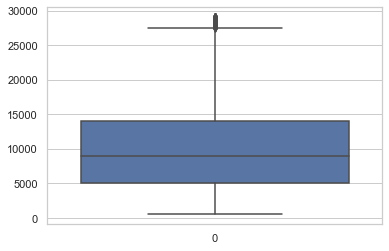

In [1376]:
#Identify the outlier, if any 
print(loan["loan_amnt"].describe())
sns.boxplot(data=loan["loan_amnt"])
plt.show()

In [1203]:
sns.boxplot(data=loan[["annual_inc","loan_amnt","funded_amnt","installment"]])
plt.show()
#print(loan["annual_inc"].mean())

<b>Obervation: </br>
    There are few outlier in Annual_inc, needs to be removed/replace

### For classifying the data  of 39717, To remove outlier use interquantile spacing method. i,e., 3rd Quantile + (3rd Quantile - 1st Quantile) * 1.5. The distance of the 3rd to the 1st Quantile will be multiplied with 1.5, and added to the 3rd Quantile. 

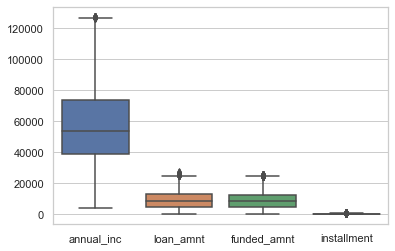

In [1378]:
#Identify the Outlier using interquantile spacing method: 
#   3rd Quantile +  (3rd - 1st Quantile) * 1.5

max_loan_amnt = (loan["loan_amnt"].quantile(.75) - loan["loan_amnt"].quantile(.25)) * 1.5 + loan["loan_amnt"].quantile(.75)
max_funded_amnt = (loan["funded_amnt"].quantile(.75) - loan["funded_amnt"].quantile(.25)) * 1.5 + loan["funded_amnt"].quantile(.75)
max_installment = (loan["installment"].quantile(.75) - loan["installment"].quantile(.25)) * 1.5 + loan["installment"].quantile(.75)
max_annual_inc = (loan["annual_inc"].quantile(.75) - loan["annual_inc"].quantile(.25)) * 1.5 + loan["annual_inc"].quantile(.75)

#Remove all the outliers
loan = loan[loan["loan_amnt"] < max_loan_amnt]
loan = loan[loan["funded_amnt"] < max_funded_amnt]
loan = loan[loan["installment"] < max_installment]
loan = loan[loan["annual_inc"] < max_annual_inc]

#After removing the outlier
sns.boxplot(data=loan[["annual_inc","loan_amnt","funded_amnt","installment"]])
plt.show()

<b>Obervation: </br>
    After removing the outlier check and verify there are no more outliear

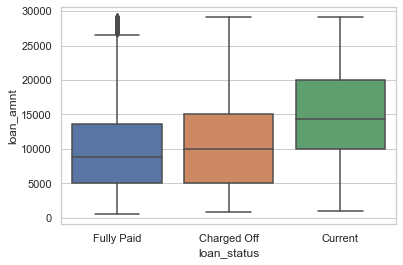

In [1205]:
plt.figsize=(30,15)
sns.histplot(data=loan, x="loan_amnt", hue="loan_status")
plt.show()

sns.boxplot(y=loan["loan_amnt"], x=loan["loan_status"])
plt.show()

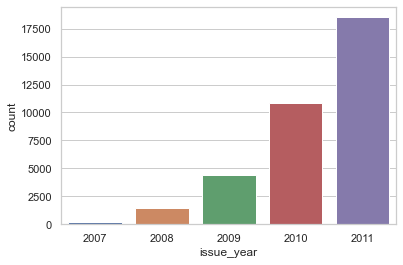

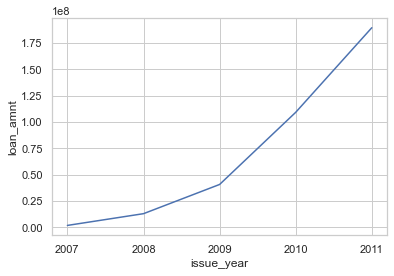

In [1322]:
#Growth of Loan amount Issued over past years
order = sorted(loan["issue_year"].unique())
sns.countplot("issue_year", data=loan, order=order)
plt.show()
#Growth of Loan amount Issued over past years
loan_len_pivot = pd.pivot_table(loan, index = ['issue_year'], aggfunc= {'loan_amnt':lambda x: x.sum()})

sns.lineplot(data=loan_len_pivot, x="issue_year", y="loan_amnt")
plt.show()

<b>Observation: </br>
Number of issued Loan has increased over past years </br>
Loan amount also has significtantly increased over the years

# Univariate Analysis

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

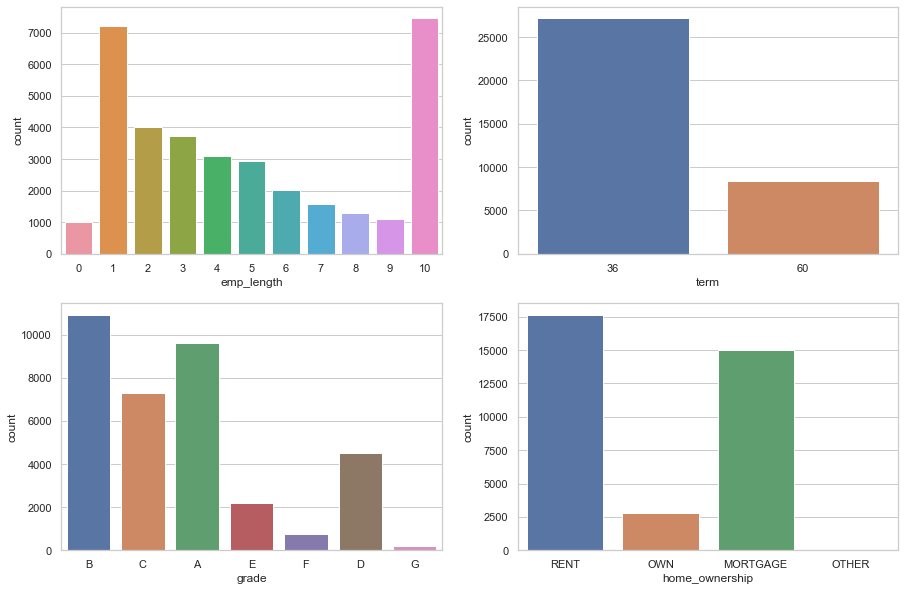

In [1350]:
plt.figsize=(20,60)
loan['int_rate_bin'] = pd.qcut(x= loan['int_rate'], q = [0,.25,.50,.75,1.], labels=['A[0-9]%', 'B[9-12]%','C[12-15]%','D[15-24]%'])
loan['annual_inc_bins'] = pd.qcut(x= loan['annual_inc'], q = [0,.2,.4,.6,.8,1.], labels=['A-low', 'B-lower-mid','C-middle','D-higher-mid','E-high'])
loan['revol_util_bin'] = pd.qcut(x= loan['revol_util'], q = [0,.2,.4,.6,.8,1.], labels=['.0Q','.20Q', '.40Q','.60Q','.80Q'])
loan['dti_rate_bin'] = pd.qcut(x= loan['dti'], q = [0,.25,.50,.75,1.], labels=['A[0-9]%', 'B[9-14]%','C[14-19]%','D[19-30]%'])
loan['installment_bin'] = pd.qcut(x= loan['dti'], q = [0,.25,.50,.75,1.], labels=['.0Q','.25Q', '.50Q','.75Q'])

fig,axes = plt.subplots(2,2,figsize=(15,10))
sns.countplot("emp_length", data=loan, ax=axes[0,0])
sns.countplot("term", data=loan, ax=axes[0,1])
sns.countplot("grade", data=loan, ax=axes[1,0])
sns.countplot("home_ownership", data=loan, ax=axes[1,1])


<b>Observation: </br>
Majority of borrowers has more than 10+ years of experience or < 1 year of experience</br>
Majority of borrowers has taken 36 months of term </br>
Most of the loan are sanctioned for lower loan_grade (A being the lowest grade)</br>
Most of borrowers either has Rented or Mortgaged</br>


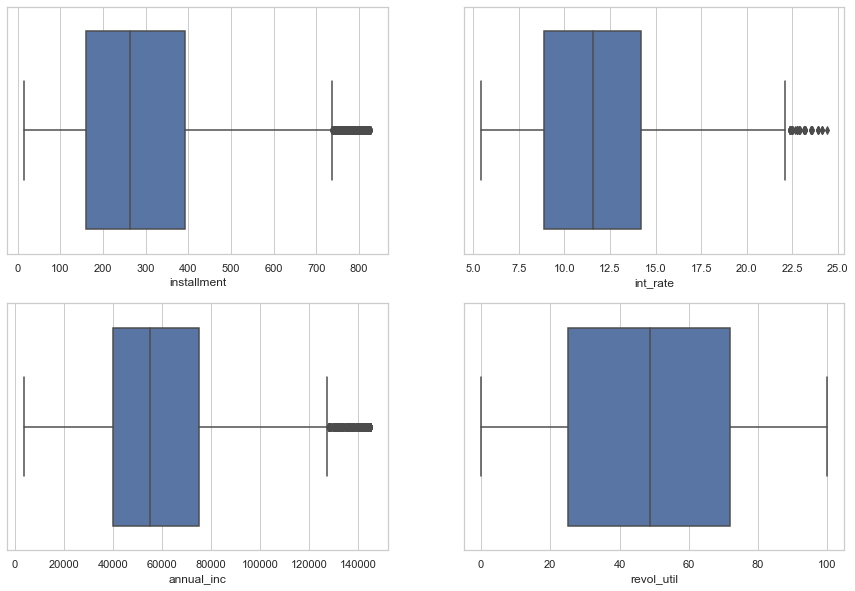

In [1356]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
sns.boxplot("installment", data=loan, ax=axes[0,0])
#sns.countplot("int_rate_bin", data=loan, ax=axes[0,1])
sns.boxplot("int_rate", data=loan, ax=axes[0,1])
sns.boxplot("annual_inc", data=loan, ax=axes[1,0])
sns.boxplot("revol_util", data=loan, ax=axes[1,1])
plt.show()

<b>Observation: </br>
Installment has mean of 292.19</br>
int_rate has mean of 11.75</br>
annul_inc has mean of 60027</br>
revol_util has mean of 48</br>


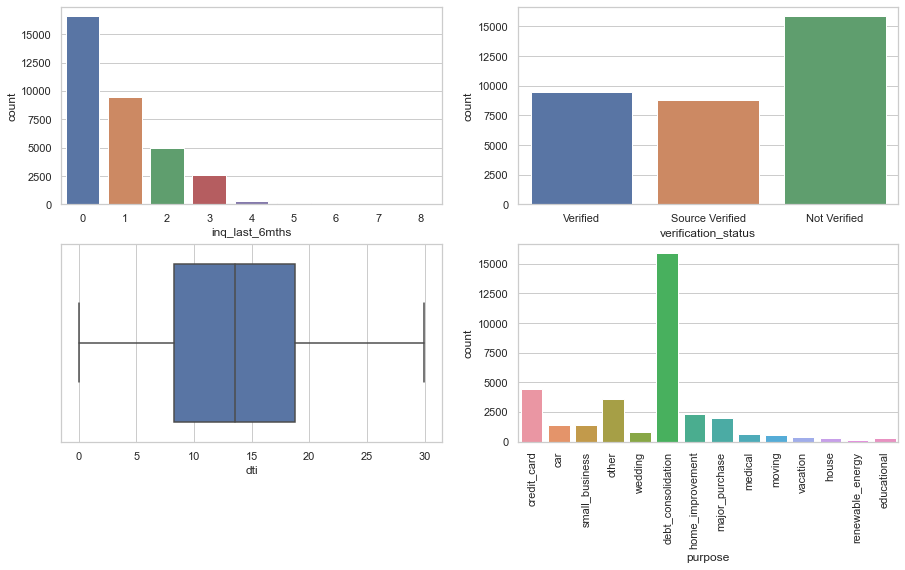

In [1379]:
fig,axes = plt.subplots(2,2,figsize=(15,8))
sns.countplot("inq_last_6mths", data=loan, ax=axes[0,0])
plt.xticks(rotation=90)
sns.countplot("verification_status", data=loan, ax=axes[0,1])
sns.boxplot("dti", data=loan, ax=axes[1,0])
plt.xticks(rotation=90)
sns.countplot("purpose", data=loan, ax=axes[1,1])
#sns.countplot(data=loan,"instal",axes=ax[0,1])
plt.show()

<b>Observation:</br>
Very few borrowers inquired in last 6 months</br>
Majority of borrowers are not verified </br>
DTI has mean of 13.4 </br>
Most people borrowed the loan for debt_consolidation, credit_card, home_improvemnt </br>


In [1208]:
# function to print the Percentage on top of the count plot bar
def plot_with_percentage(data, feature, hue, sort):
    if sort:
        order = sorted(data[feature].unique())
    else:
        order = data[feature].unique()
        
    ax = sns.countplot(x = feature, data=data, hue=hue, order=order) #deep, muted, bright, pastel, dark, colorblind
    ax.set_ylabel('Count')

    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")


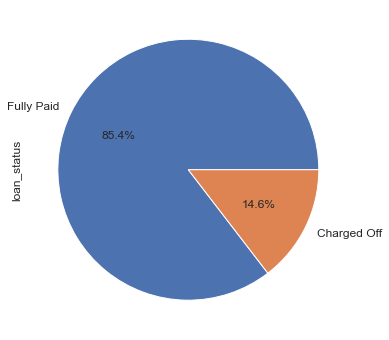

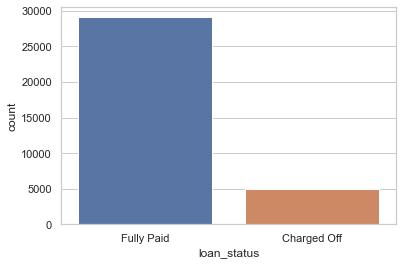

In [1381]:
#Find the percent of defaulters using pie chart

plt.subplots(figsize=(40,20))
loan['loan_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=[10,6], fontsize ='12')
plt.show()
sns.countplot(data= loan, x="loan_status")
plt.show()

<b>Observation: </br>
Majority of the loan are Fully paid.


In [1210]:
#drop all the records which has current as loan_status (these are not usefull for our analysis)
loan = loan[loan['loan_status'] != 'Current']

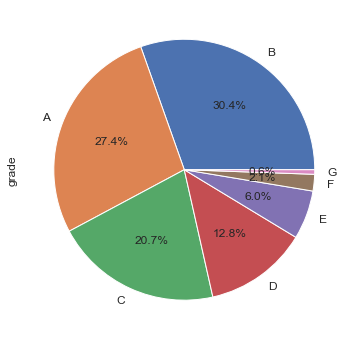

In [1382]:
plt.subplots(figsize=(20,10))
loan['grade'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=[10,6], fontsize ='12')
plt.show()

<b>Observation: </br>
    Most of the loans are sanctioned with low grade A,B,C means lower interest rate

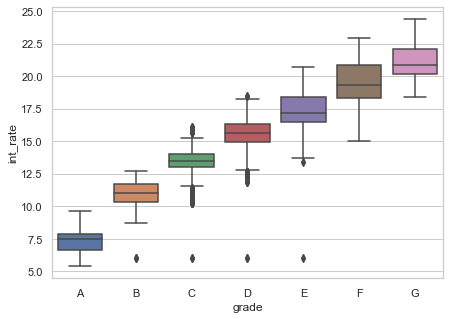

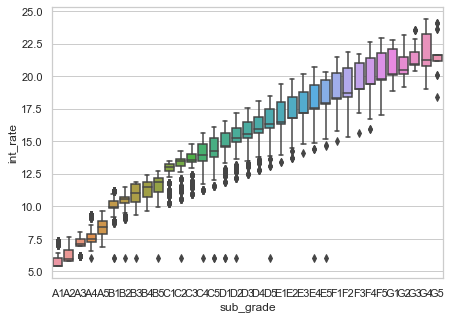

In [1370]:
plt.figure(figsize=(7,5))
order = sorted(loan['grade'].unique())
sns.boxplot(data=loan, x='grade', y ='int_rate', order = order)
plt.show()
plt.figure(figsize=(7,5))
order = sorted(loan['sub_grade'].unique())
sns.boxplot(data=loan, x='sub_grade', y ='int_rate', order = order)
plt.show()

<b> Observation:   </br>
Grade is categorised into 7 grade from A-to-G based on the int_rate.. grade 'A' being lowest int_rate </br>
Most of the loans are sanctioned with low grade A,B,C means lower interest rate.</br>

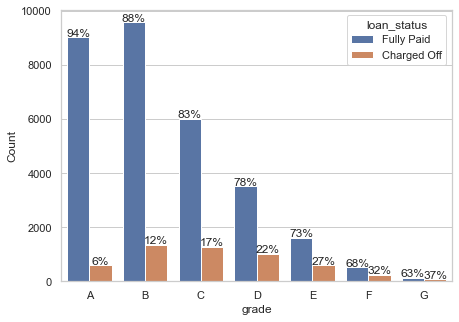

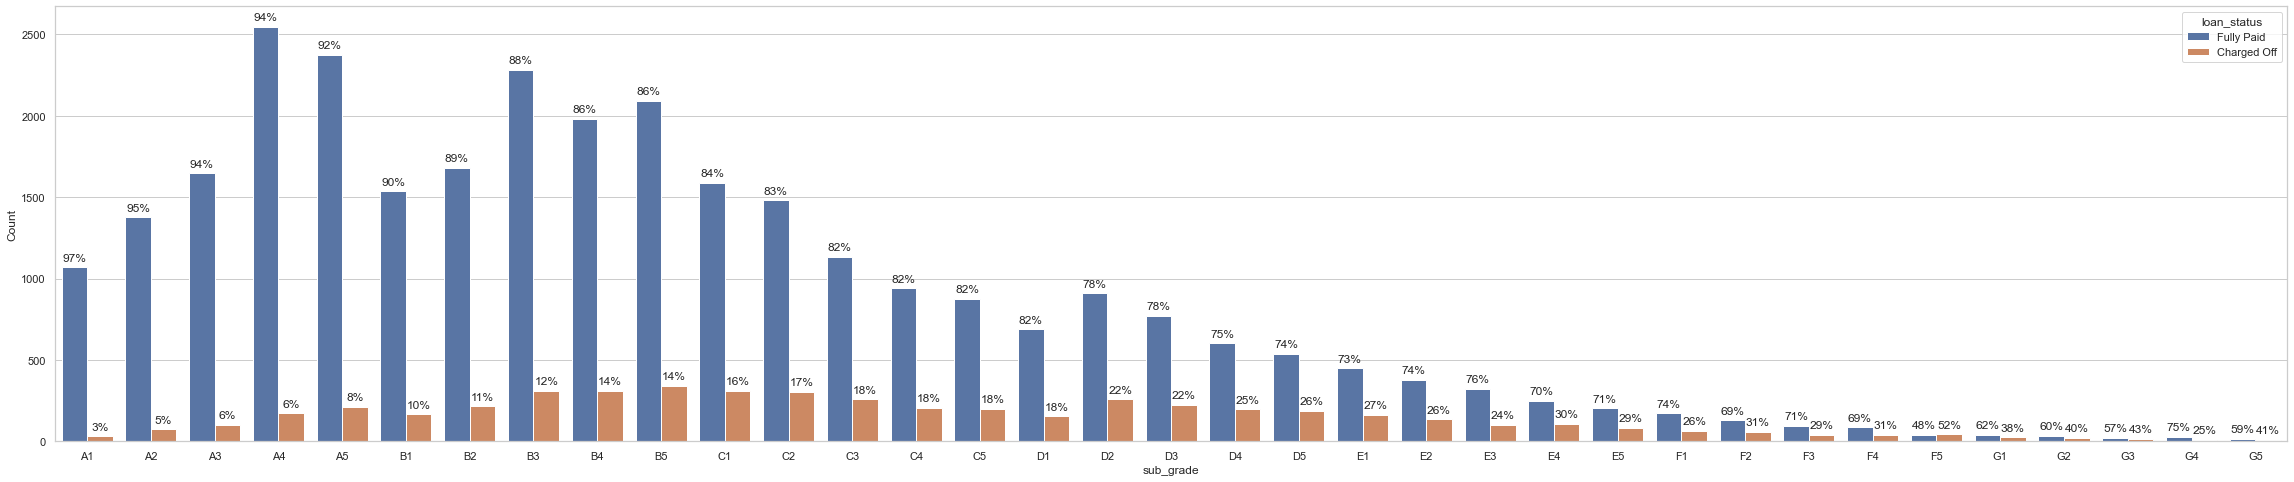

In [1371]:
plt.figure(figsize=(7,5))
plot_with_percentage(loan, 'grade', 'loan_status', 1)
plt.show()

plt.figure(figsize=(40,8))
plot_with_percentage(loan, 'sub_grade', 'loan_status', 1)
plt.show()

<b>Observation: </br>
Grade is categorised into 7 grade from A-to-G based on the int_rate.. grade 'A' being lowest int_rate
Most of the loans are sanctioned with low grade A,B,C means lower interest rate.
</br>

In [1310]:
# There are some rows with 'NONE' values (replace with ==> 'OTHER')
loan['home_ownership'] = loan['home_ownership'].apply(lambda x: 'OTHER' if x == 'NONE' else x)

plt.figure(figsize=(10,5))
plot_with_percentage(loan, 'home_ownership', 'loan_status', 0)
plt.show()
print(loan['home_ownership'].unique())

<b>Observation:</br>Higher percentage of re-paid customers are those who have mortgaged owerner-ship

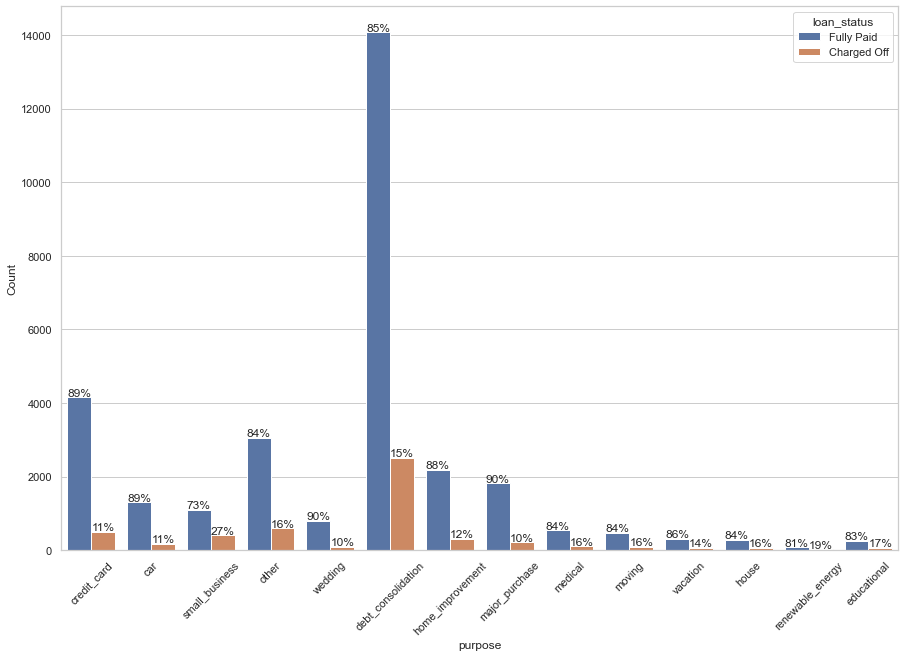

In [1372]:
plt.figure(figsize=(15,10))
plot_with_percentage(loan, 'purpose', 'loan_status', 0)
plt.xticks(rotation=45)
plt.show()

<b>Observation:</br>
Higher percentage of defaulter seen in "small_business (27%)",  renewable_energy(19%),  Educational(%17%) </br>



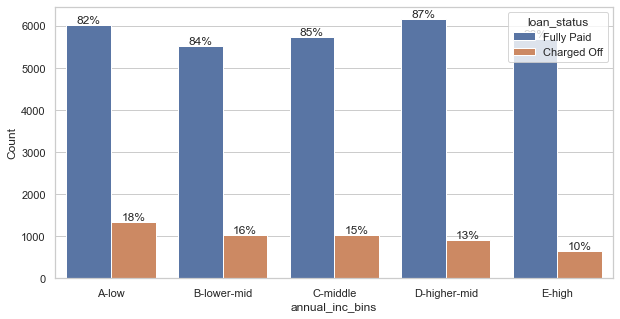

In [1385]:
loan['annual_inc_bins'] = pd.qcut(x= loan['annual_inc'], q = [0,.2,.4,.6,.8,1.], labels=['A-low', 'B-lower-mid','C-middle','D-higher-mid','E-high'])
plt.figure(figsize=(10,5))
plot_with_percentage(loan, 'annual_inc_bins', 'loan_status', 1)
plt.show()

<b>Observation: </br>
Higher percentage of defaulter are more likely in the lower income. as the chart indicate the percentage of defaulter increases with lower income range


count    35485.000000
mean        11.757993
std          3.604205
min          5.420000
25%          8.900000
50%         11.580000
75%         14.220000
max         24.400000
Name: int_rate, dtype: float64


<Figure size 720x360 with 0 Axes>

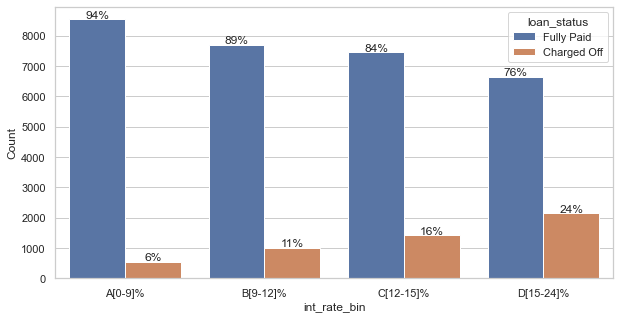

In [1216]:
plt.figure(figsize=(10,5))
print(loan['int_rate'].describe())
loan['int_rate_bin'] = pd.qcut(x= loan['int_rate'], q = [0,.25,.50,.75,1.], labels=['A[0-9]%', 'B[9-12]%','C[12-15]%','D[15-24]%'])

plt.figure(figsize=(10,5))
plot_with_percentage(loan, 'int_rate_bin', 'loan_status', 1)
plt.show()

<b>Observation: </br>
The defaulter percentage is higher with high rate of interest </br>



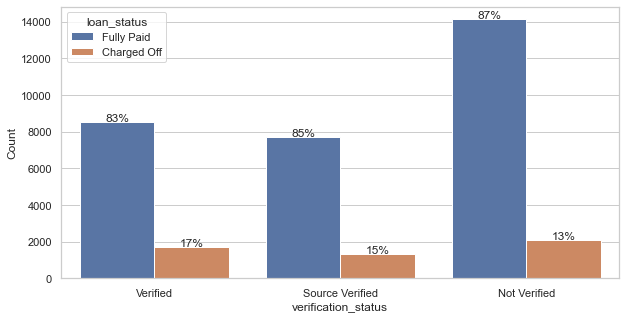

In [1217]:
plt.figure(figsize=(10,5))
plot_with_percentage(loan, 'verification_status', 'loan_status', 0)
plt.show()

<b>Observation: </br>
The defaulter percentage Verified borrowers </br>


count    34077.000000
mean        13.432237
std          6.678014
min          0.000000
25%          8.310000
50%         13.550000
75%         18.730000
max         29.990000
Name: dti, dtype: float64


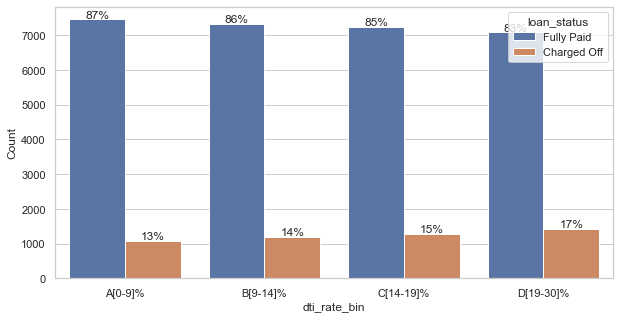

In [1388]:
plt.figure(figsize=(10,5))
print(loan['dti'].describe())
loan['dti_rate_bin'] = pd.qcut(x= loan['dti'], q = [0,.25,.50,.75,1.], labels=['A[0-9]%', 'B[9-14]%','C[14-19]%','D[19-30]%'])

#sns.countplot(data=loan, x=loan['dti_rate_bin'], hue = loan['loan_status'])
plot_with_percentage(loan, 'dti_rate_bin', 'loan_status', 1)
plt.show()


<b>Observation: </br>
Higher percentage of defaulter are more likely to have hight dti percentage, as the chart indicate the percetage of defautler increases with Higher dti percentage.

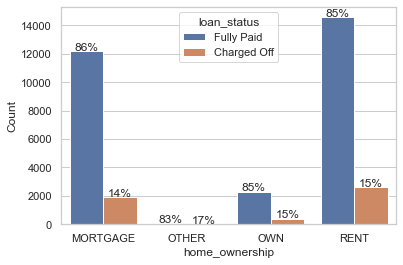

In [1391]:
#sns.countplot(data=loan, x=loan['dti_rate_bin'], hue = loan['loan_status'])
plot_with_percentage(loan, 'home_ownership', 'loan_status', 1)
plt.show()


<b>Observation: </br>
Higher percentage of re-paid customers are those who have mortgaged owener-ship


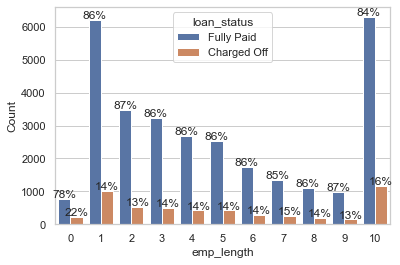

In [1219]:
#sns.countplot(x='emp_length', data=loan, hue='loan_status')
plot_with_percentage(loan, 'emp_length', 'loan_status', 1)
plt.show()

<b>Observation:</br>
Defaulter percentage is almost same across all Emp_length and does not indicate any specific trend</br>


In [1392]:
print(loan[loan['loan_status'] == 'Fully Paid'].groupby(loan['emp_length']).count()['loan_status'])

emp_length
0      764
1     5986
2     3378
3     3103
4     2590
5     2445
6     1646
7     1294
8     1061
9      924
10    5922
Name: loan_status, dtype: int64


In [1221]:
#Calulate the Percentage of paid and defaulters based on the employment length

emp_len_and_fp_perc = (loan[loan['loan_status'] == 'Fully Paid'].groupby(loan['emp_length']).count()['loan_status'])/(loan[loan['loan_status'] == 'Fully Paid'].count()['loan_status']) *100
print("Employment length-wise percentage calucalated for Fully Paid", emp_len_and_fp_perc)
emp_len_and_co_perc = (loan[loan['loan_status'] == 'Charged Off'].groupby(loan['emp_length']).count()['loan_status'] )/ (loan[loan['loan_status'] == 'Charged Off'].count()['loan_status']) * 100
print("Employment length-wise percentage calucalated for Fully Paid", emp_len_and_co_perc)


Employment length-wise percentage calucalated for Fully Paid emp_length
0      2.559457
1     20.413071
2     11.486264
3     10.636406
4      8.854338
5      8.343764
6      5.695369
7      4.437051
8      3.646485
9      3.198498
10    20.729297
Name: loan_status, dtype: float64
Employment length-wise percentage calucalated for Fully Paid emp_length
0      4.291008
1     19.953189
2     10.298420
3      9.927833
4      8.191925
5      8.152916
6      5.539302
7      4.661595
8      3.549834
9      2.828165
10    22.605812
Name: loan_status, dtype: float64


Ratio calucalated for Fully Paid and Charged-Off customer based Employment length-wise emp_length
0     1.676531
1     0.977471
2     0.896586
3     0.933382
4     0.925188
5     0.977127
6     0.972598
7     1.050607
8     0.973495
9     0.884216
10    1.090525
Name: loan_status, dtype: float64


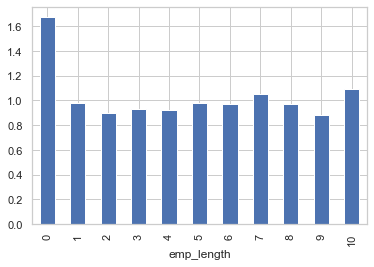

In [1222]:
#Calulate the ration between paid and defaulters.. 

ratio = emp_len_and_co_perc/emp_len_and_fp_perc

print("Ratio calucalated for Fully Paid and Charged-Off customer based Employment length-wise", ratio)
ratio.plot.bar()
plt.show()

<b>Observation:</br>
The plot on the right indicate the ratio to "Fully Paid" to "Charged Off", which indicate almost all has same ratio, There is not significant difference.</br>

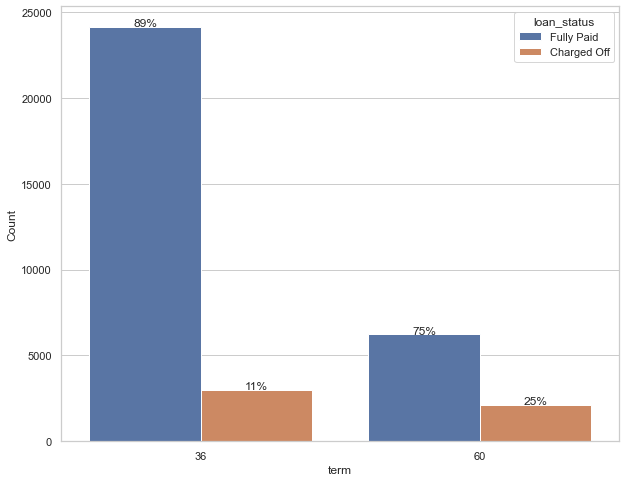

In [1227]:
plt.figure(figsize=(10,8))
plot_with_percentage(loan, 'term', 'loan_status', 1)
plt.show()

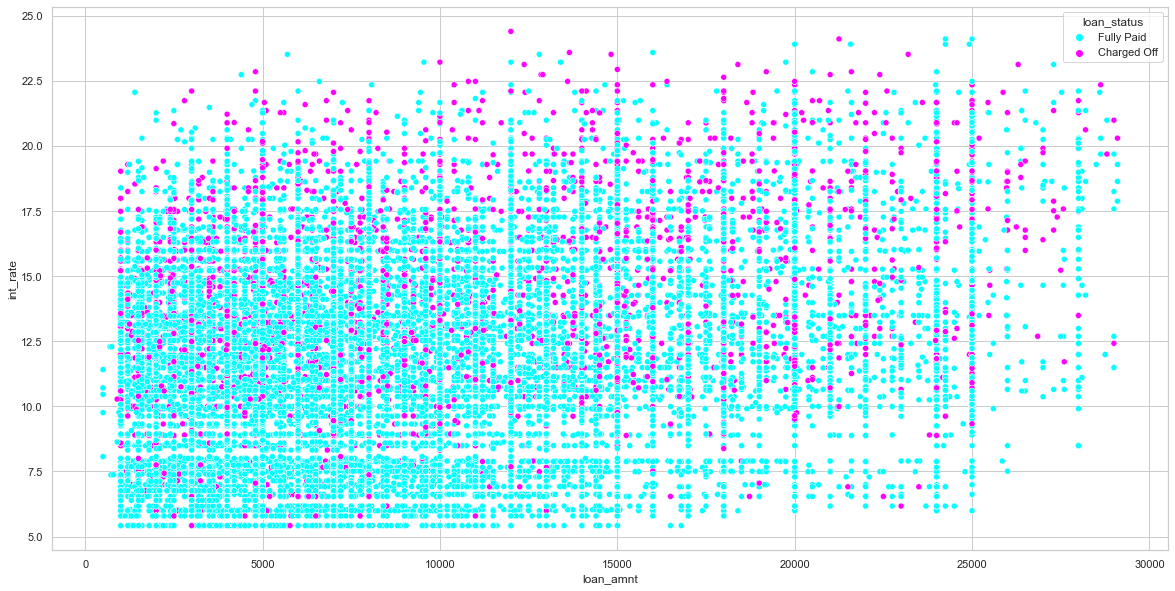

In [1228]:
plt.figure(figsize=(20,10))
sns.scatterplot(data= loan, x= "loan_amnt", y= "int_rate", hue= "loan_status", palette = ["#00ffff",'#ff00ff'] )
plt.show()


<b>Observation: </br>
The Majority of defaulter is seen with high rate of interest


posx and posy should be finite values
posx and posy should be finite values


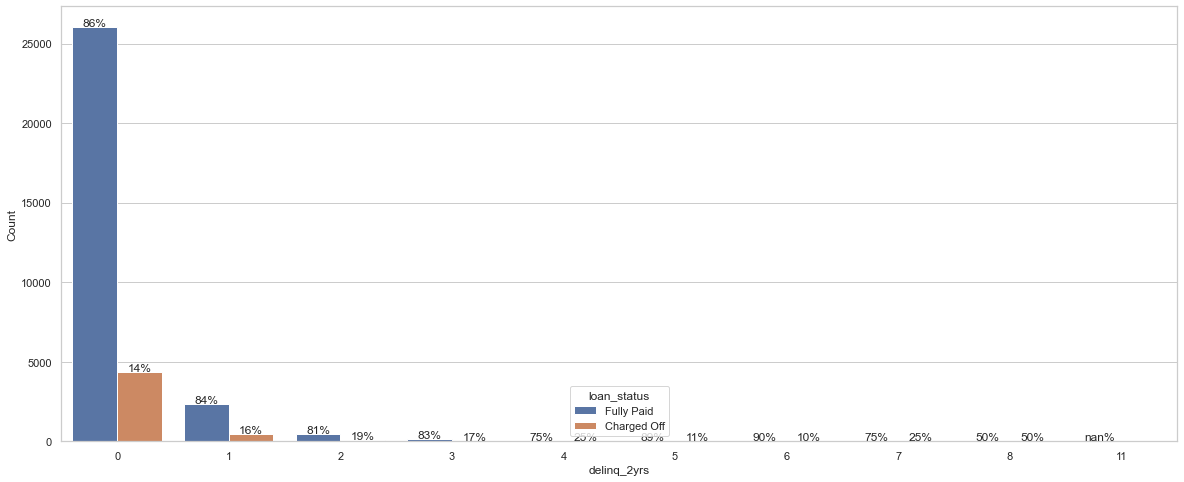

In [1394]:
plt.figure(figsize=(20,8))
plot_with_percentage(loan, 'delinq_2yrs', 'loan_status', 1)
plt.show()

<b>Observation:</br>
Percentage of defaulter increasing with value of delinq_2yrs increase


count    35485.000000
mean        48.458044
std         28.273041
min          0.000000
25%         25.100000
50%         48.800000
75%         71.800000
max         99.900000
Name: revol_util, dtype: float64


<Figure size 1440x720 with 0 Axes>

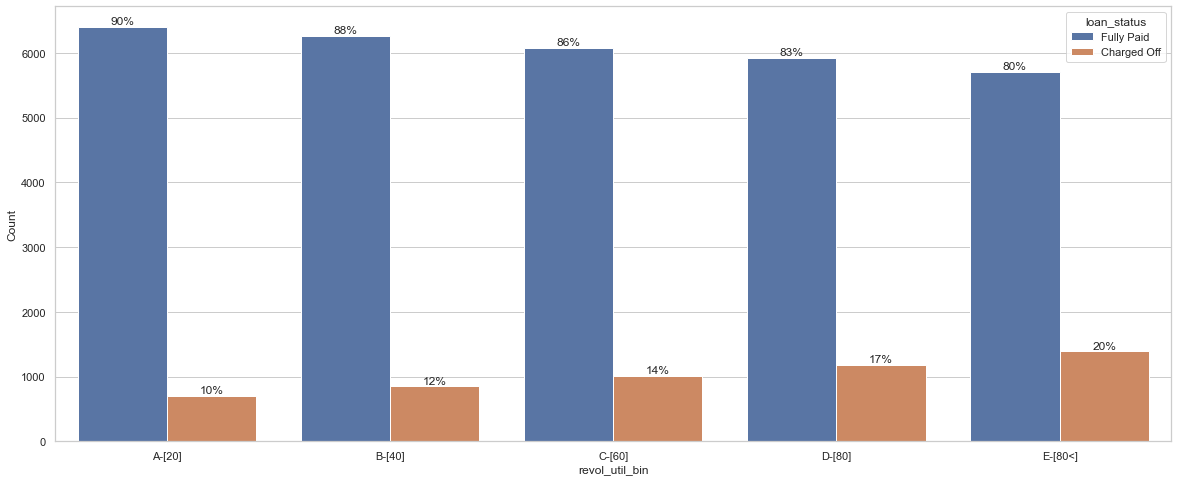

In [1230]:
print(loan['revol_util'].describe())
plt.figure(figsize=(20,10))
loan['revol_util_bin'] = pd.qcut(x= loan['revol_util'], q = [0,.2,.4,.6,.8,1.], labels=['A-[20]', 'B-[40]','C-[60]','D-[80]','E-[80<]'])
plt.figure(figsize=(20,8))
plot_with_percentage(loan, 'revol_util_bin', 'loan_status', 1)
plt.show()

<b>Observation:</br>
Percentage of defaulter increasing with higher revol_util value


count     35485.000000
mean      11941.754262
std       13442.144385
min           0.000000
25%        3460.000000
50%        8268.000000
75%       15649.000000
max      149000.000000
Name: revol_bal, dtype: float64


<Figure size 1440x720 with 0 Axes>

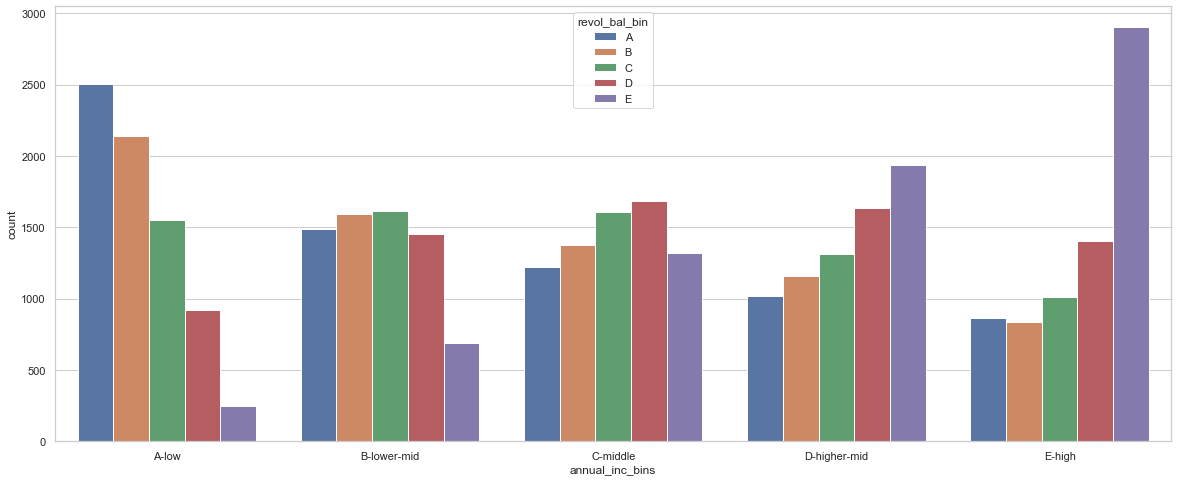

In [1231]:
print(loan['revol_bal'].describe())
plt.figure(figsize=(20,10))
loan['revol_bal_bin'] = pd.qcut(x= loan['revol_bal'], q = [0,.2,.4,.6,.8,1.], labels=['A', 'B','C','D','E'])
plt.figure(figsize=(20,8))
sns.countplot(data=loan, x=loan['annual_inc_bins'], hue=loan['revol_bal_bin'])
plt.show()

#High income category people are more likely to have reloving bal.

<b>Observation:</br>
the revol_bal is increasing as the annual_income is increased


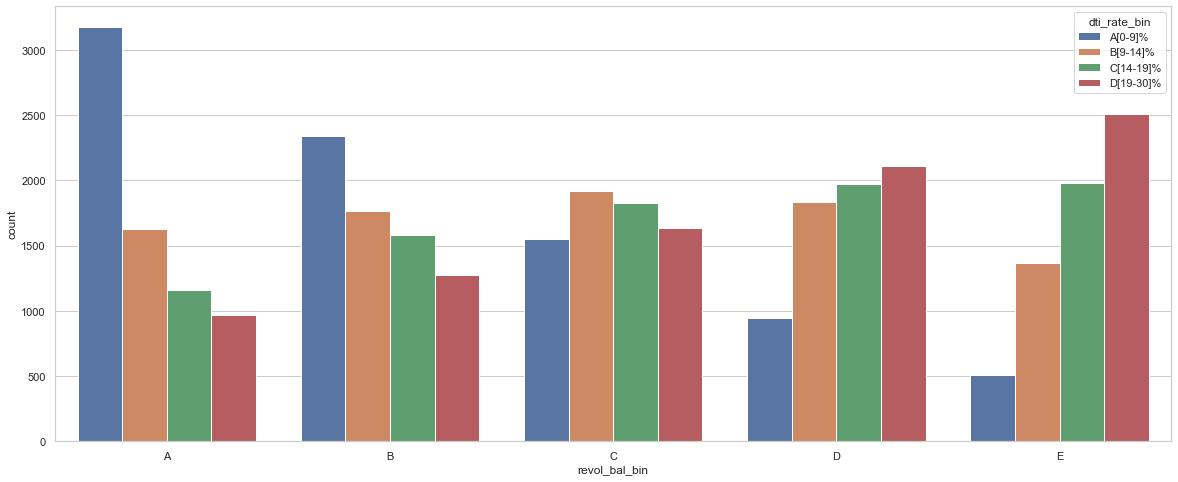

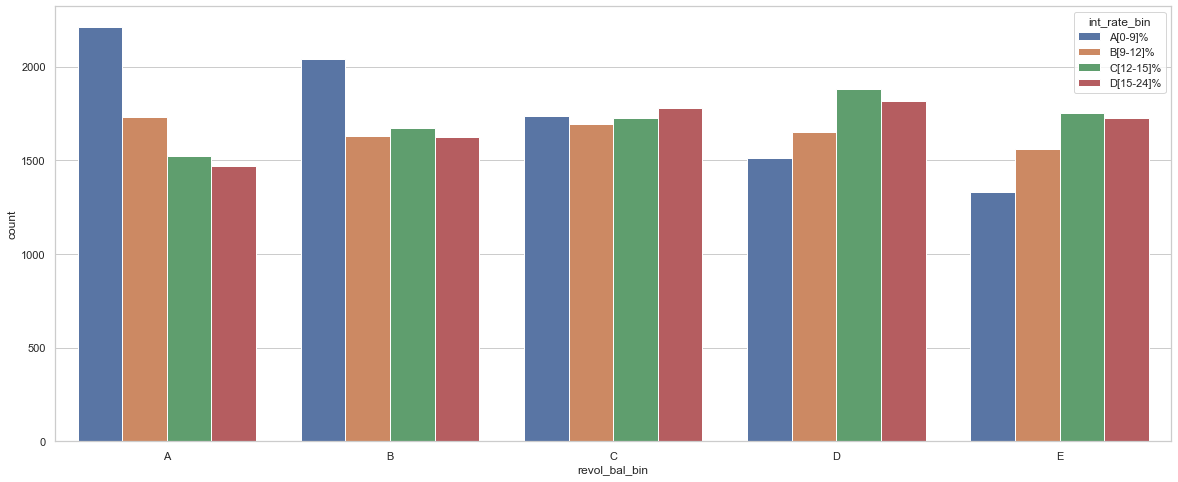

In [1398]:
plt.figure(figsize=(20,8))
sns.countplot(data=loan, hue=loan['dti_rate_bin'], x=loan['revol_bal_bin'])
plt.show()

plt.figure(figsize=(20,8))
sns.countplot(data=loan, hue=loan['int_rate_bin'], x=loan['revol_bal_bin'])
plt.show()

<b>Observation:</br>
the revol_bal is increases as the dti value is increased </br>
the revol_bal is increases as the Int_rate is increased


In [ ]:
plt.figure(figsize=(10,12))
plt.figure(figsize=(20,8))
sns.countplot(data=loan, hue=loan['loan_status'], x=loan['total_rec_prncp'])
plt.show()

In [1233]:
print(loan['total_rec_prncp'].unique())

[ 5000.     456.46  2400.   ...  1730.83   544.02 16077.42]


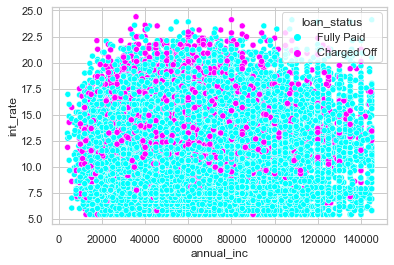

In [1234]:

sns.scatterplot(data= loan, x= "annual_inc", y= "int_rate", hue= loan["loan_status"], palette = ["#00ffff",'#ff00ff'] )
plt.show()

<b>Observation:</br>
Most defaulter as seen on Higher intrest_rate


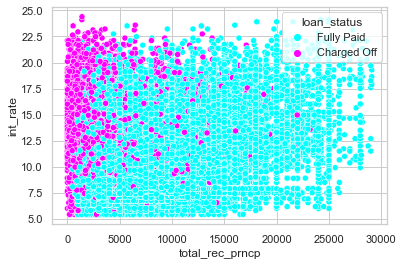

In [1235]:
sns.scatterplot(data= loan, x= "total_rec_prncp", y= "int_rate", hue= loan["loan_status"], palette = ["#00ffff",'#ff00ff'] )
plt.show()

<b>Observation:</br>
Most defaulter as seen on Higher intrest_rate and Most defaulter are defaulting in the initial repayment itself (higher number of people who have defaulted paid 5000 or less) 


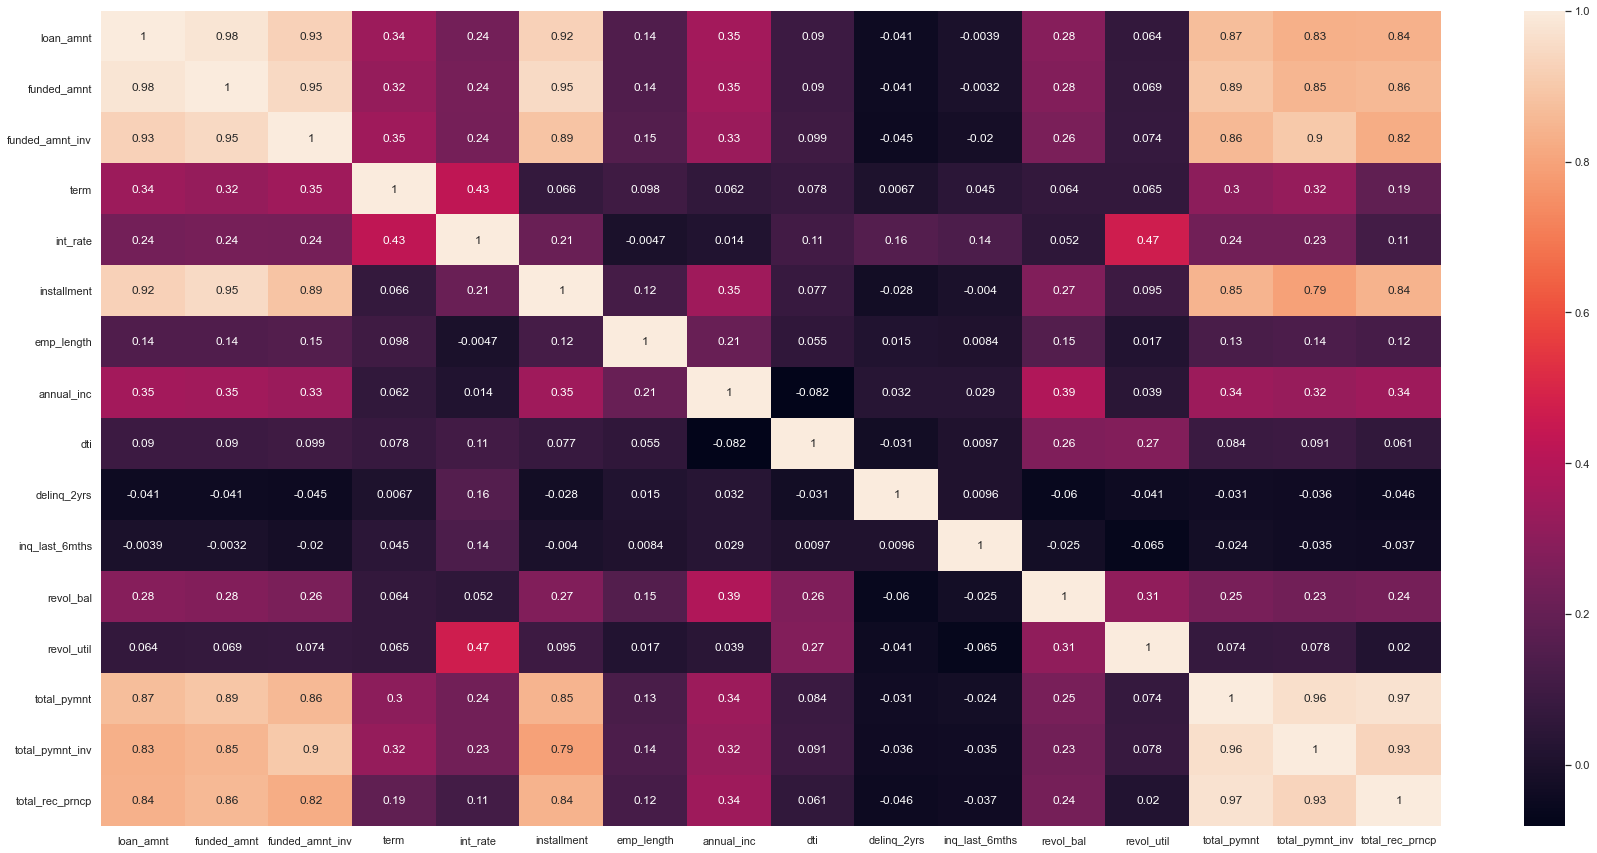

In [1236]:
plt.figure(figsize=(30,15))
sns.heatmap(loan.corr(),annot=True)
plt.show()

<b>Observation:</b></br>
High correlation is observer with the following variables:</br>
Annual_inc (very good indicator for loan eligibility): </br>

<b>positive correlation with:</b> </br>
- loan_amount, total_paymt, total_rec_prncp, installment variable </br>
<b>negative correlation with:</b></br>
- int_rate, revol_bal, revol_util, dti  </br>
int_rate has positive correlation with  term, revol_bal, revol_util</br>


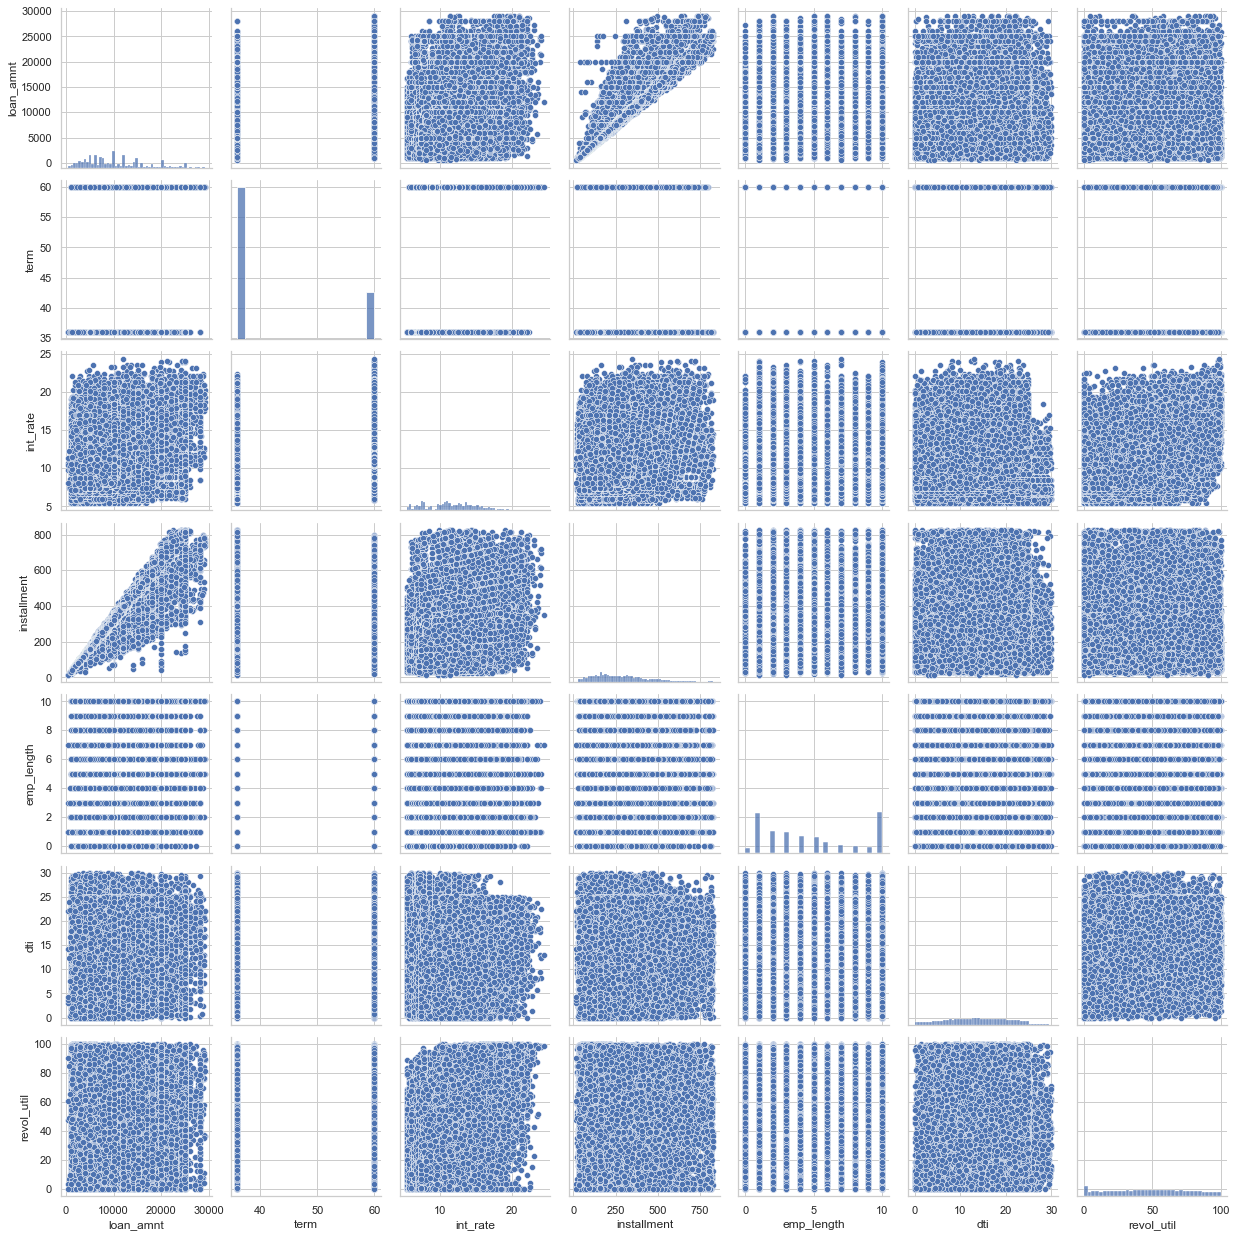

In [1245]:
sns.pairplot(data=loan[['loan_amnt','term','int_rate','installment','emp_length','dti','revol_util']])
plt.show()